#Importing Dataset From Kaggle

In [ ]:
import kagglehub
mateuszbuda_lgg_mri_segmentation_path = kagglehub.dataset_download('mateuszbuda/lgg-mri-segmentation')

print('Data source import complete.')

Using Colab cache for faster access to the 'lgg-mri-segmentation' dataset.
Data source import complete.


#Imports

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, BatchNormalization, Activation, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ModelCheckpoint

#Dataset Preparation

In [ ]:
data_dir = "/kaggle/input/lgg-mri-segmentation/kaggle_3m"

masks_paths = glob(f"{data_dir}/*/*_mask*")
images_paths = [i.replace("_mask", "") for i in masks_paths]
df = pd.DataFrame({"images_paths": images_paths, "masks_paths": masks_paths})

#Train Model

Found 3143 validated image filenames.
Found 3143 validated image filenames.
Found 393 validated image filenames.
Found 393 validated image filenames.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 256, 256,  │      1,792 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_38[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 128, 128,  │          0 │ conv2d_39[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_8[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_40[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 64, 64,    │          0 │ conv2d_41[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 64, 64,    │    295,168 │ max_pooling2d_9[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_42[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 32, 32,    │          0 │ conv2d_43[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_10… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 32, 32,    │  2,359,808 │ conv2d_44[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 16, 16,    │          0 │ conv2d_45[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_11… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 16, 16,    │  9,438,208 │ conv2d_46[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_8  │ (None, 32, 32,    │  2,097,664 │ conv2d_47[0][0]   │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 32, 32,    │          0 │ conv2d_transpose

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.7772 - dice_coef: 0.1744 - iou_coef: 0.1122 - loss: 0.8256 - val_accuracy: 0.9869 - val_dice_coef: 0.4899 - val_iou_coef: 0.3284 - val_loss: 0.5101
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.9886 - dice_coef: 0.5100 - iou_coef: 0.3494 - loss: 0.4910 - val_accuracy: 0.9919 - val_dice_coef: 0.4690 - val_iou_coef: 0.3115 - val_loss: 0.5310
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.9898 - dice_coef: 0.5167 - iou_coef: 0.3568 - loss: 0.4876 - val_accuracy: 0.9936 - val_dice_coef: 0.5211 - val_iou_coef: 0.3652 - val_loss: 0.4774
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.9900 - dice_coef: 0.5293 - iou_coef: 0.3713 - loss: 0.4736 - val_accuracy: 0.9934 - val_dice_coef: 0.5939 - val_iou_coef: 0.4257 - val_loss: 0.4048
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.9909 - dice_coef: 0.5646 - iou_coef: 0.4054 - loss: 0.4328 - val_accuracy: 0.9933 -

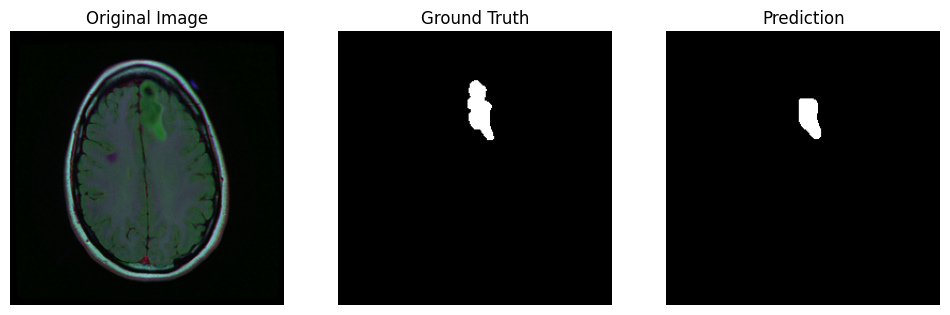

In [ ]:
train_df, dummy_df = train_test_split(df, train_size=0.8, random_state=42)
valid_df, test_df = train_test_split(dummy_df, train_size=0.5, random_state=42)


img_size = (256, 256)
batch_size = 40

tr_aug_dict = dict(rotation_range=0.2,
                   width_shift_range=0.05,
                   height_shift_range=0.05,
                   shear_range=0.05,
                   zoom_range=0.05,
                   horizontal_flip=True,
                   fill_mode="nearest")

train_img_gen = ImageDataGenerator(**tr_aug_dict).flow_from_dataframe(train_df, x_col="images_paths", class_mode=None, color_mode="rgb",
    target_size=img_size, batch_size=batch_size, seed=1)

train_mask_gen = ImageDataGenerator(**tr_aug_dict).flow_from_dataframe(train_df, x_col="masks_paths", class_mode=None, color_mode="grayscale",
    target_size=img_size, batch_size=batch_size, seed=1)

valid_img_gen = ImageDataGenerator().flow_from_dataframe(valid_df, x_col="images_paths", class_mode=None, color_mode="rgb",
    target_size=img_size, batch_size=batch_size, seed=1)

valid_mask_gen = ImageDataGenerator().flow_from_dataframe(valid_df, x_col="masks_paths", class_mode=None, color_mode="grayscale",
    target_size=img_size, batch_size=batch_size, seed=1)

def train_generator():
    for img, msk in zip(train_img_gen, train_mask_gen):
        yield (img/255.0, (msk/255.0 > 0.5).astype(np.float32))

def valid_generator():
    for img, msk in zip(valid_img_gen, valid_mask_gen):
        yield (img/255.0, (msk/255.0 > 0.5).astype(np.float32))


def dice_coef(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

def iou_coef(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

# ===============================
# U-Net model
# ===============================
inputs = Input((256, 256, 3))

# Encoder Section
e1 = Conv2D(64, 3, activation="relu", padding="same")(inputs)
e1 = Conv2D(64, 3, activation="relu", padding="same")(e1)
p1 = MaxPooling2D((2, 2))(e1)

e2 = Conv2D(128, 3, activation="relu", padding="same")(p1)
e2 = Conv2D(128, 3, activation="relu", padding="same")(e2)
p2 = MaxPooling2D((2, 2))(e2)

e3 = Conv2D(256, 3, activation="relu", padding="same")(p2)
e3 = Conv2D(256, 3, activation="relu", padding="same")(e3)
p3 = MaxPooling2D((2, 2))(e3)

e4 = Conv2D(512, 3, activation="relu", padding="same")(p3)
e4 = Conv2D(512, 3, activation="relu", padding="same")(e4)
p4 = MaxPooling2D((2, 2))(e4)

e5 = Conv2D(1024, 3, activation="relu", padding="same")(p4)
e5 = Conv2D(1024, 3, activation="relu", padding="same")(e5)

# Decoder Section
d4 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding="same")(e5)
d4 = concatenate([d4, e4])
c6 = Conv2D(512, 3, activation="relu", padding="same")(d4)
c6 = Conv2D(512, 3, activation="relu", padding="same")(c6)

d3 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding="same")(c6)
d3 = concatenate([d3, e3])
c7 = Conv2D(256, 3, activation="relu", padding="same")(d3)
c7 = Conv2D(256, 3, activation="relu", padding="same")(c7)

d2 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c7)
d2 = concatenate([d2, e2])
c8 = Conv2D(128, 3, activation="relu", padding="same")(d2)
c8 = Conv2D(128, 3, activation="relu", padding="same")(c8)

d1 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c8)
d1 = concatenate([d1, e1])
c9 = Conv2D(64, 3, activation="relu", padding="same")(d1)
c9 = Conv2D(64, 3, activation="relu", padding="same")(c9)

outputs = Conv2D(1, 1, activation="sigmoid")(c9)

model = Model(inputs, outputs)
model.compile(optimizer=Adamax(1e-3), loss=dice_loss, metrics=["accuracy", iou_coef, dice_coef])
model.summary()


callbacks = [ModelCheckpoint("unet_simplified.keras", save_best_only=True)]
history = model.fit(train_generator(), steps_per_epoch=len(train_df)//batch_size, validation_data=valid_generator(),validation_steps=len(valid_df)//batch_size,epochs=20,callbacks=callbacks)


idx = np.random.randint(0, len(test_df))
img = cv2.imread(test_df["images_paths"].iloc[idx])
mask = cv2.imread(test_df["masks_paths"].iloc[idx], 0)
img_resized = cv2.resize(img, (256, 256)) / 255.0
pred = model.predict(img_resized[np.newaxis, ...])[0, :, :, 0] > 0.5

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(img_resized); plt.title("Original Image"); plt.axis("off")
plt.subplot(1, 3, 2); plt.imshow(mask, cmap="gray"); plt.title("Ground Truth"); plt.axis("off")
plt.subplot(1, 3, 3); plt.imshow(pred, cmap="gray"); plt.title("Prediction"); plt.axis("off")
plt.show()


#Model Evaluation

In [ ]:

ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_generator(), steps=test_steps, verbose=1)
valid_score = model.evaluate(valid_generator(), steps=test_steps, verbose=1)

print("\n📊 Evaluation Summary:")
print(f"Train -> Loss: {train_score[0]:.4f}, Acc: {train_score[1]:.4f}, IoU: {train_score[2]:.4f}, Dice: {train_score[3]:.4f}")
print(f"Valid -> Loss: {valid_score[0]:.4f}, Acc: {valid_score[1]:.4f}, IoU: {valid_score[2]:.4f}, Dice: {valid_score[3]:.4f}")


131/131 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9960 - dice_coef: 0.7698 - iou_coef: 0.6332 - loss: 0.2301
131/131 ━━━━━━━━━━━━━━━━━━━━ 91s 692ms/step - accuracy: 0.9957 - dice_coef: 0.7418 - iou_coef: 0.5963 - loss: 0.2587

📊 Evaluation Summary:
Train -> Loss: 0.2208, Acc: 0.9960, IoU: 0.6445, Dice: 0.7792
Valid -> Loss: 0.2560, Acc: 0.9957, IoU: 0.5986, Dice: 0.7441


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


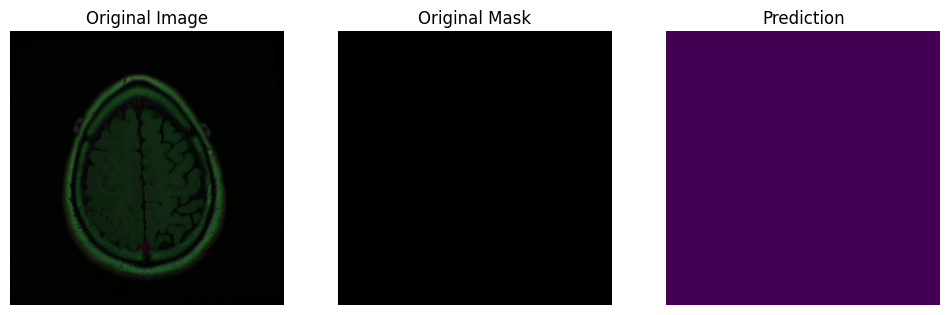

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


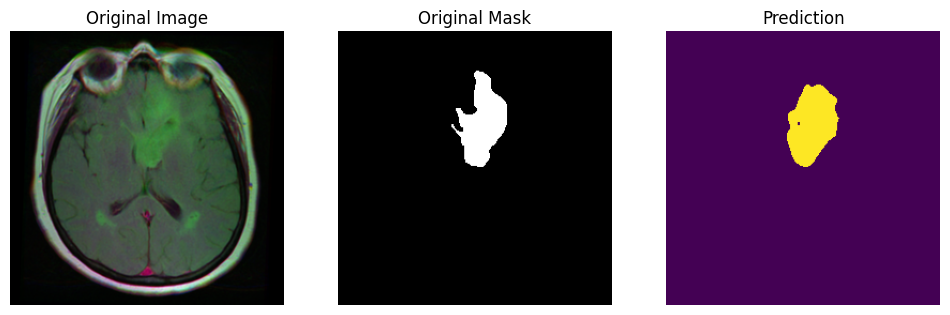

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


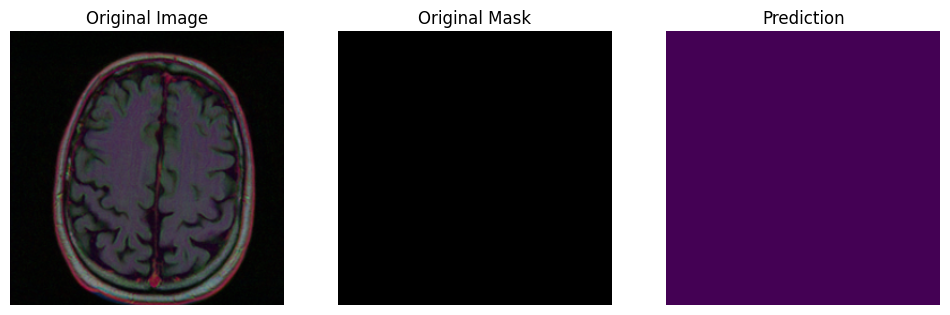

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


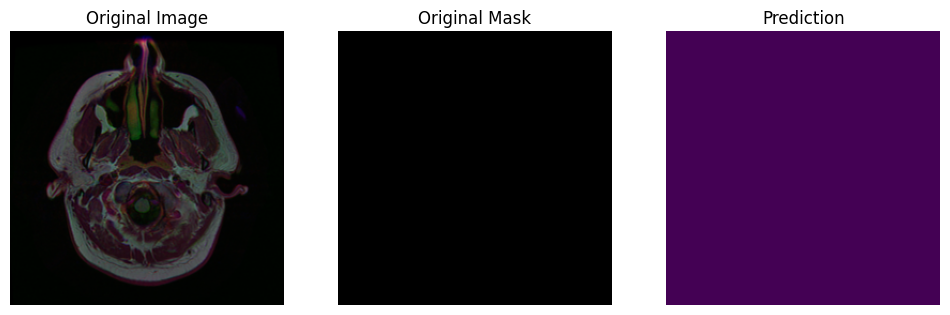

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


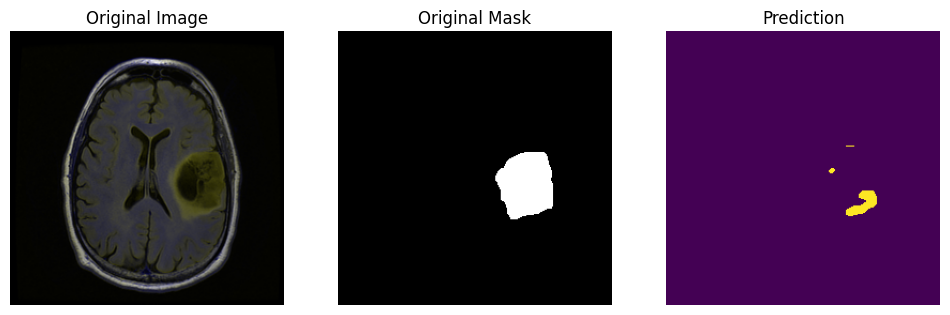

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


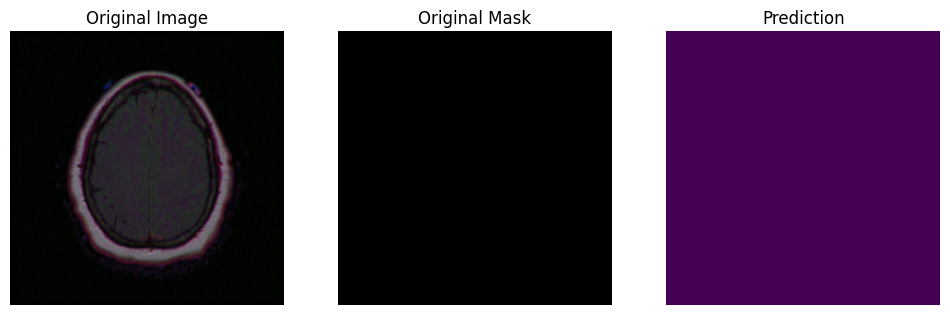

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


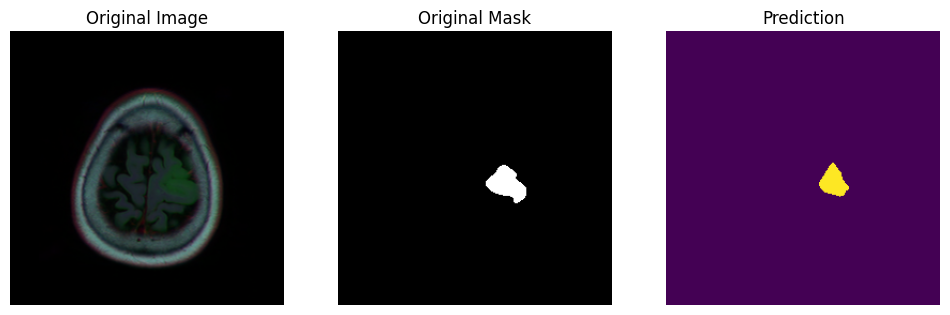

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


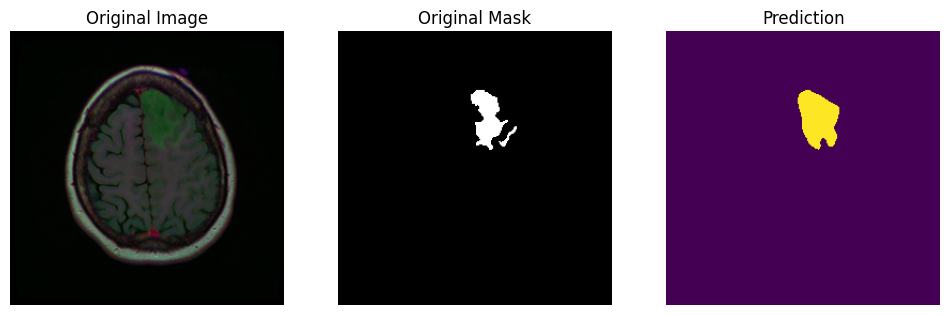

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


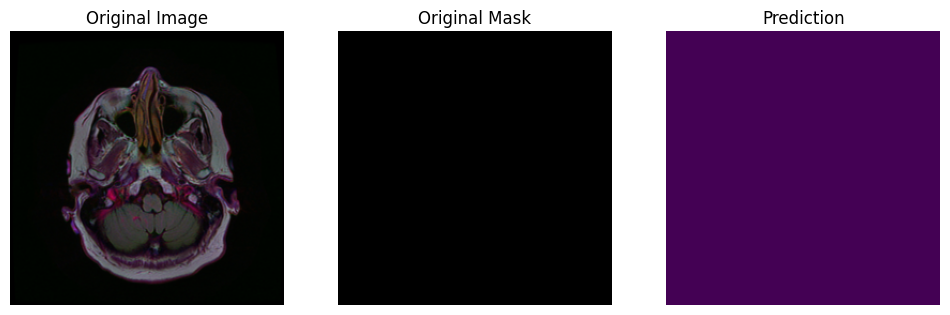

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


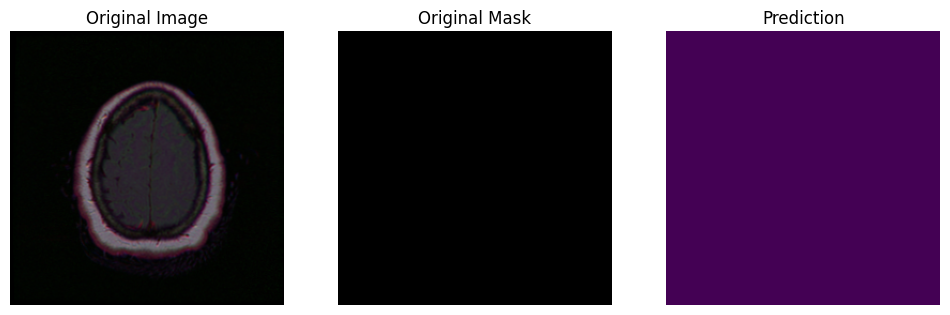

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


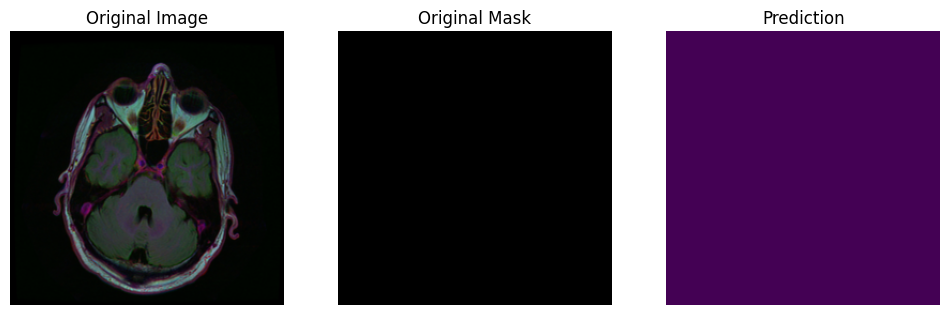

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


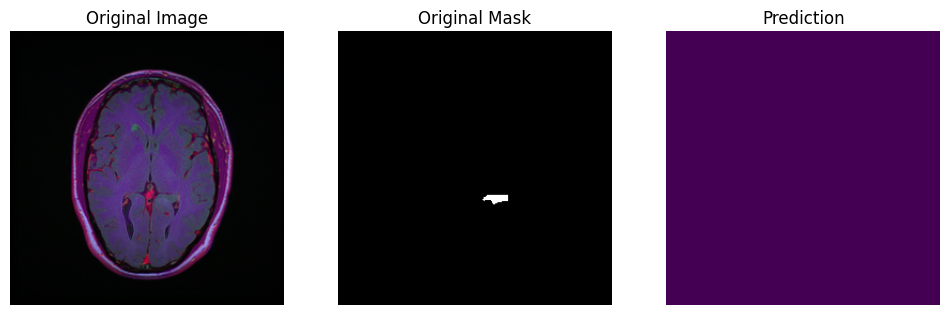

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


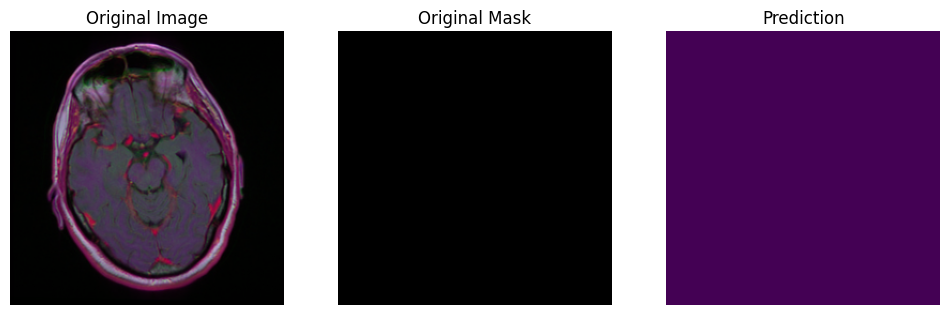

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


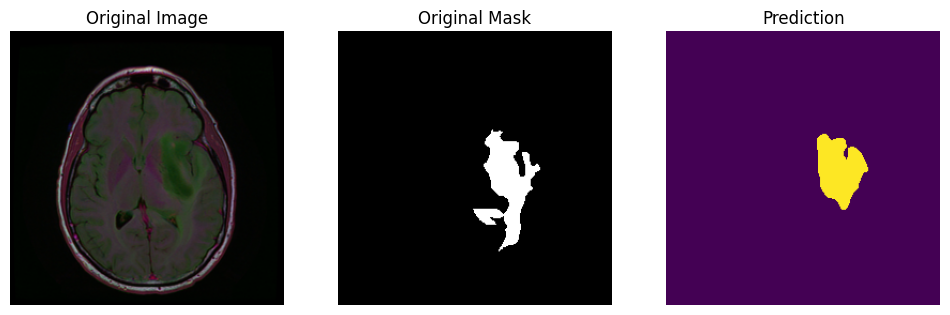

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


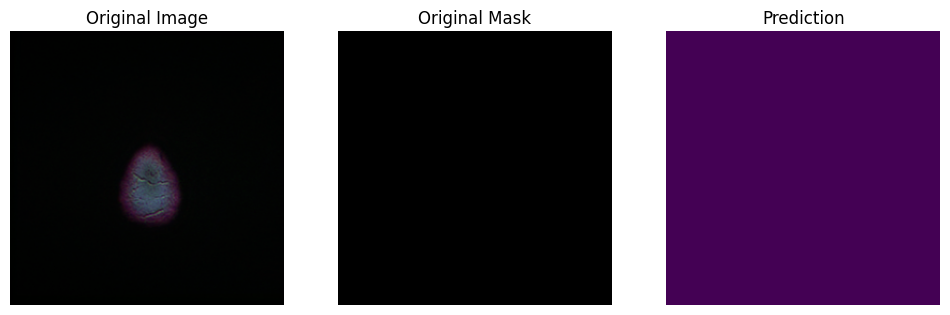

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


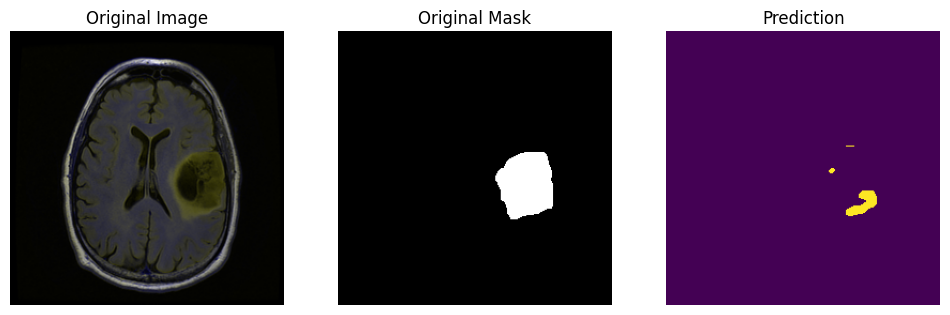

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


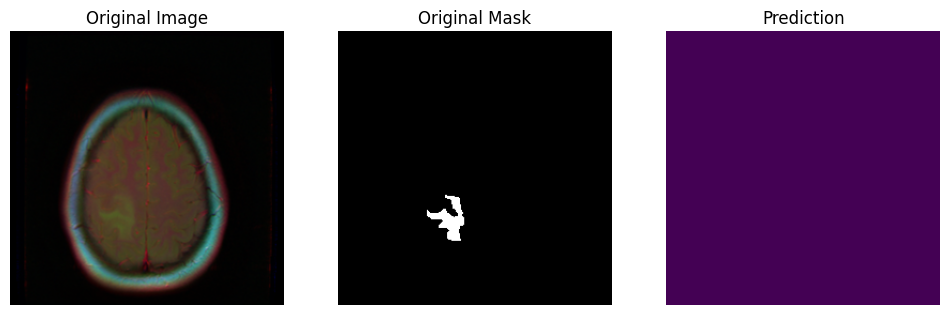

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


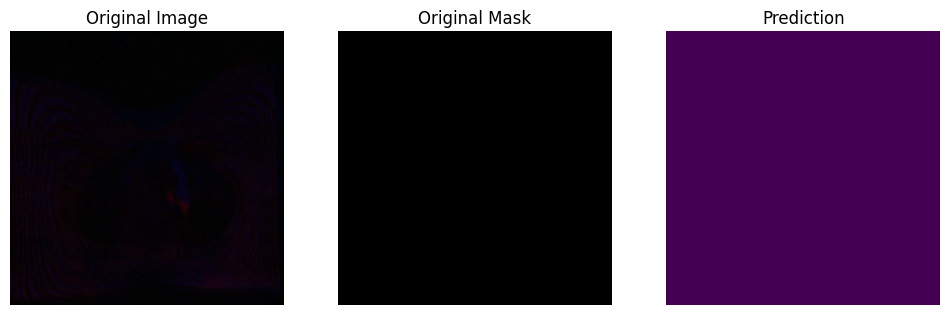

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


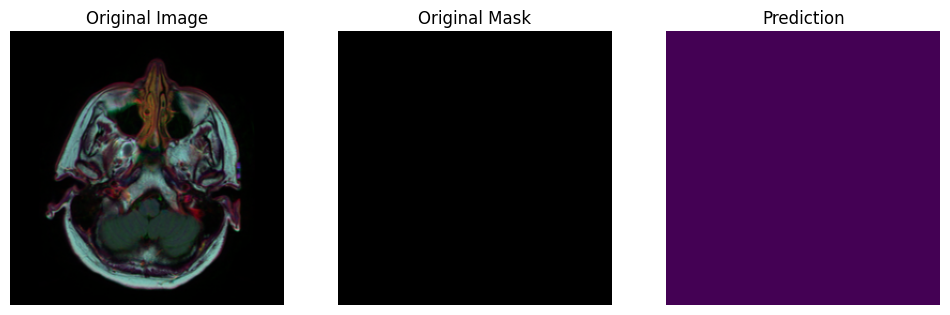

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


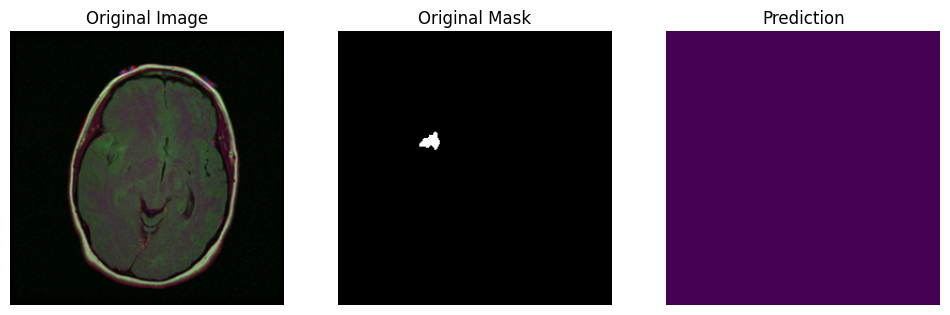

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


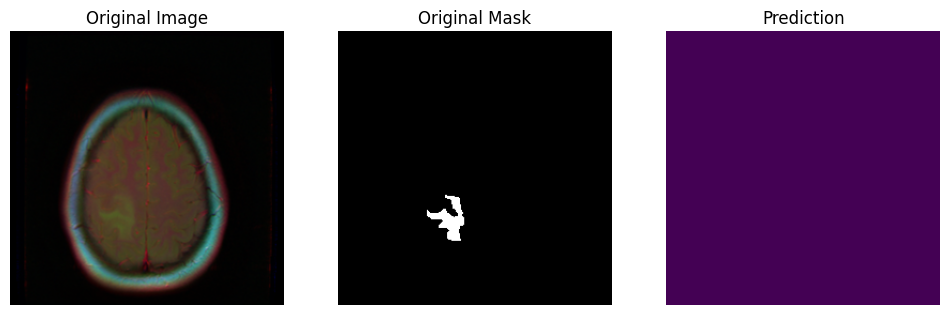

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


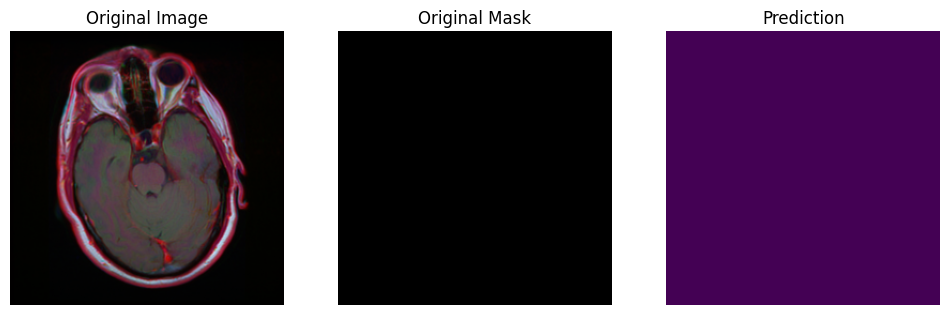

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


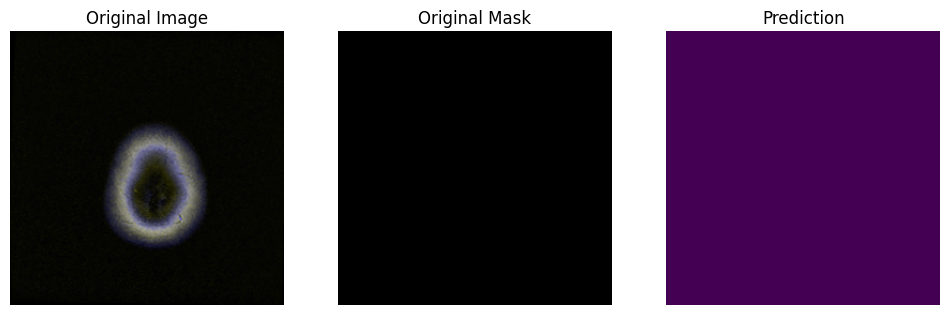

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


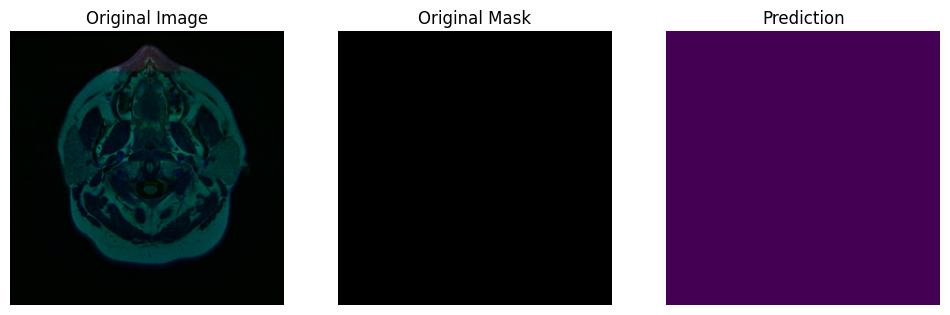

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


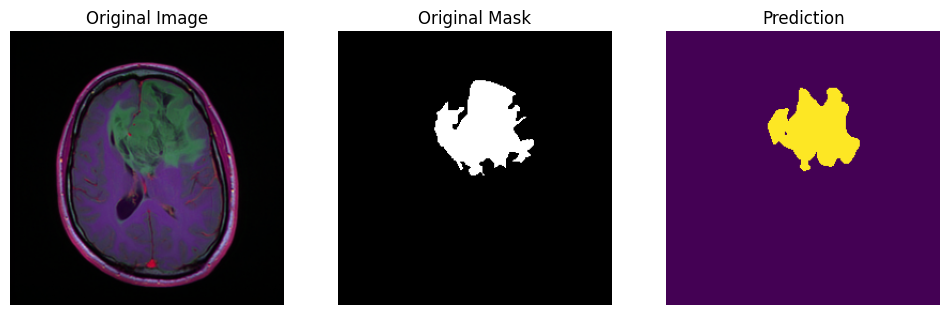

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


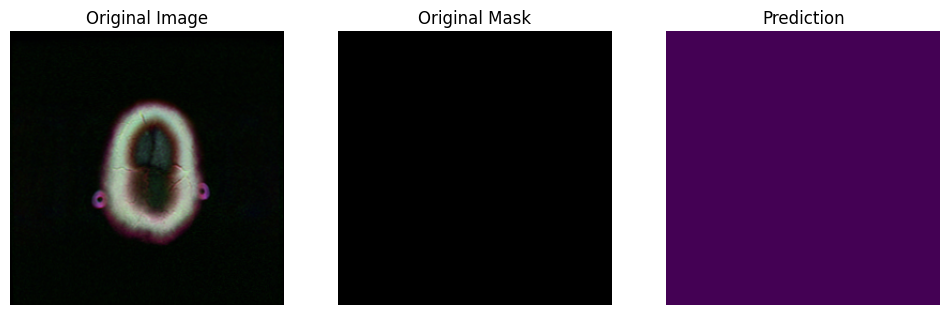

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


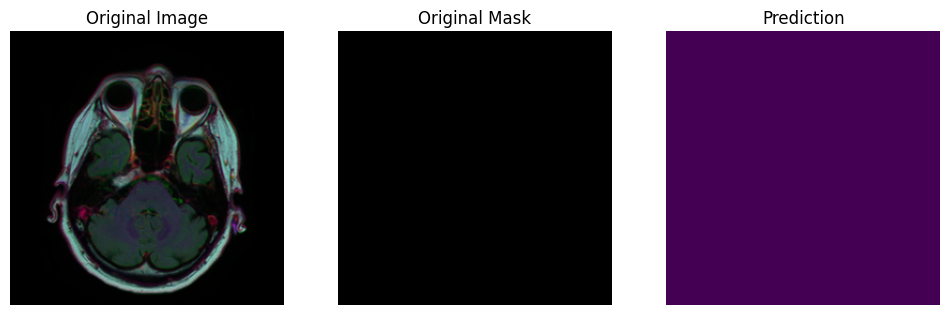

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


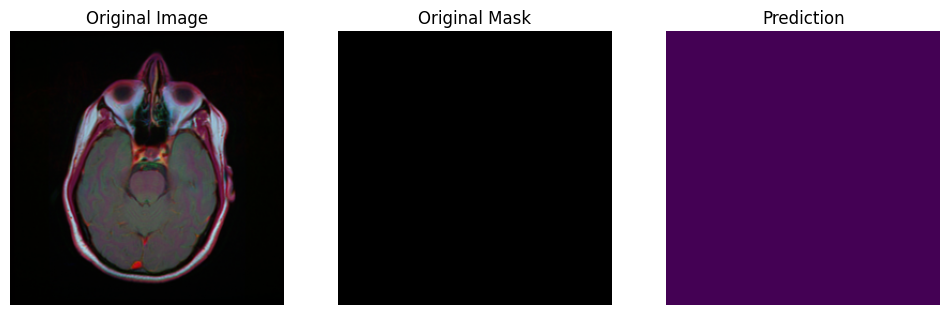

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


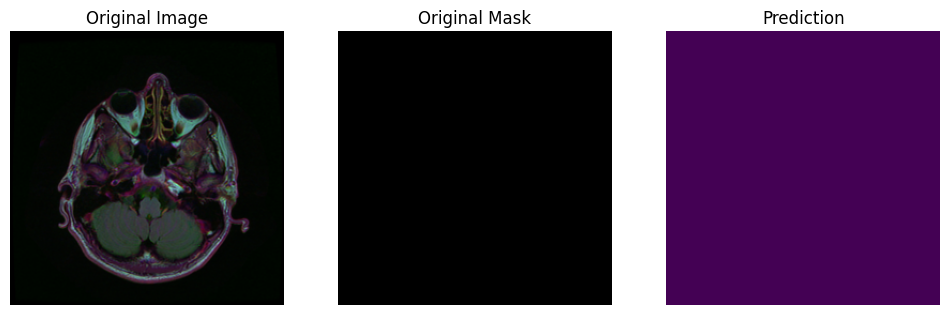

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


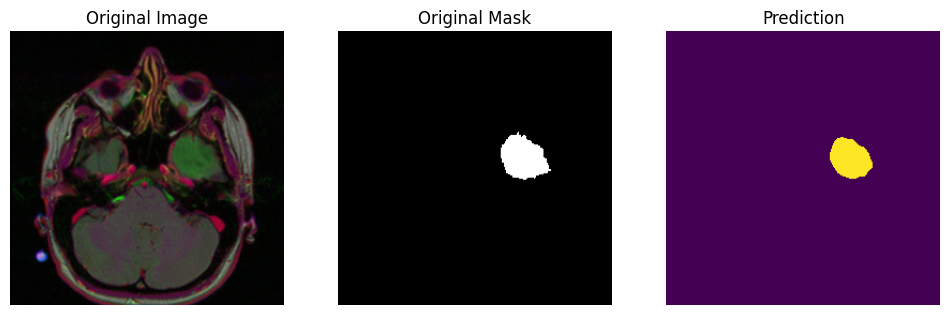

In [ ]:
for _ in range(30):
    index = np.random.randint(1, len(test_df.index))
    img = cv2.imread(test_df['images_paths'].iloc[index])
    img = cv2.resize(img, (256, 256))
    img = img/255
    img = img[np.newaxis, :, :, : ]

    predicted_img = model.predict(img)

    plt.figure(figsize=(12, 12))

    plt.subplot(1, 3, 1)
    plt.imshow(np.squeeze(img))
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(np.squeeze(cv2.imread(test_df['masks_paths'].iloc[index])))
    plt.axis('off')
    plt.title('Original Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(np.squeeze(predicted_img) > 0.5 )
    plt.title('Prediction')
    plt.axis('off')

    plt.show()

#Saving Model

In [ ]:
# Already saved best model during training with ModelCheckpoint
# Save final model explicitly
model.save("final_unet.keras")
print("\n✅ Final model saved as final_unet.keras")



✅ Final model saved as final_unet.keras


#Deploymnet

In [3]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.8 MB/s eta 0:00:00


In [4]:
%%writefile app.py
import streamlit as st
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load model
model = load_model("/content/drive/MyDrive/final_unet.keras",
                   custom_objects={'dice_loss': lambda y_true,y_pred: 0,
                                   'iou_coef': lambda y_true,y_pred: 0,
                                   'dice_coef': lambda y_true,y_pred: 0})

st.title("🧠 Brain Tumor Segmentation (U-Net)")

uploaded_file = st.file_uploader("Upload MRI Image", type=["jpg", "jpeg", "png"])
if uploaded_file is not None:
    # Read image
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    img = cv2.imdecode(file_bytes, 1)
    img_resized = cv2.resize(img, (256, 256))
    img_norm = img_resized / 255.0
    img_input = np.expand_dims(img_norm, axis=0)

    # Predict mask
    pred_mask = model.predict(img_input)[0]
    pred_mask = (pred_mask > 0.5).astype(np.uint8) * 255

    st.subheader("Original MRI")
    st.image(img_resized, channels="BGR")

    st.subheader("Predicted Tumor Mask")
    st.image(pred_mask, clamp=True)


Writing app.py


In [5]:
from pyngrok import ngrok

!ngrok authtoken 33QtoBnrfV8sG9MccqKzvU8Rgee_5esFfgsT3UgvStxnatLj4

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [6]:
from pyngrok import ngrok

# Kill any previous tunnels
ngrok.kill()

# Start streamlit
get_ipython().system_raw('streamlit run app.py --server.port 8501 &')

# Expose port 8501 via ngrok
public_url = ngrok.connect(8501)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://unhydraulic-uncalculated-ardelle.ngrok-free.dev" -> "http://localhost:8501"
